In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import shutil
from tqdm import tqdm

In [2]:
df = pd.read_csv('./data/data.csv')
files = os.listdir('./data/images')
df = df[df['filename'].isin(files)]
df.head()

,lat,lng,county,county_name,angle,filename
0,63.501095,10.963767,4,trøndelag,281,00001_0.jpg
2,69.122734,17.315359,1,troms og finnmark,320,00002_0.jpg
4,59.740894,10.419207,7,viken,226,00003_0.jpg
5,59.740894,10.419207,7,viken,46,00003_1.jpg
7,58.329872,7.205114,0,agder,116,00004_1.jpg


5250


,lat,lng,county,county_name,angle,filename
0,63.501095,10.963767,4,trøndelag,281,00001_0.jpg
1,69.122734,17.315359,1,troms og finnmark,320,00002_0.jpg
2,59.740894,10.419207,7,viken,226,00003_0.jpg
3,59.740894,10.419207,7,viken,46,00003_1.jpg
4,58.329872,7.205114,0,agder,116,00004_1.jpg


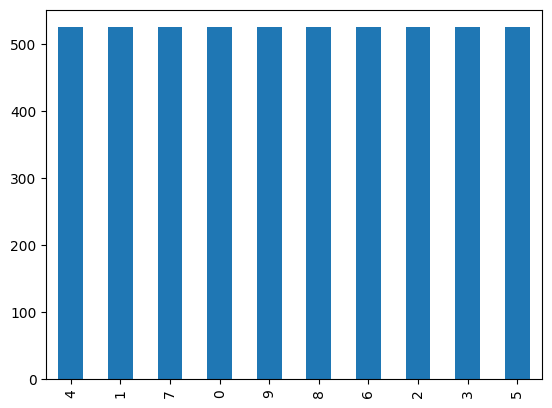

In [94]:
df_groups = df.groupby('county')
min_amt = df_groups.size().min()
df_balanced = df_groups.head(min_amt).reset_index(drop=True)
print(len(df_balanced))
df_balanced['county'].value_counts().plot.bar()
df_balanced.head()

4462
788


" \nfor i, row in tqdm(train_df.iterrows(), total=len(train_df)):\n  src = pathlib.Path('./data/images') / row['filename']\n  dst = pathlib.Path('./data/NSVD/train') / row['filename']\n  shutil.copy(src, dst)\n\nfor i, row in tqdm(test_df.iterrows(), total=len(test_df)):\n  src = pathlib.Path('./data/images') / row['filename']\n  dst = pathlib.Path('./data/NSVD/test') / row['filename']\n  shutil.copy(src, dst)\n\n   "

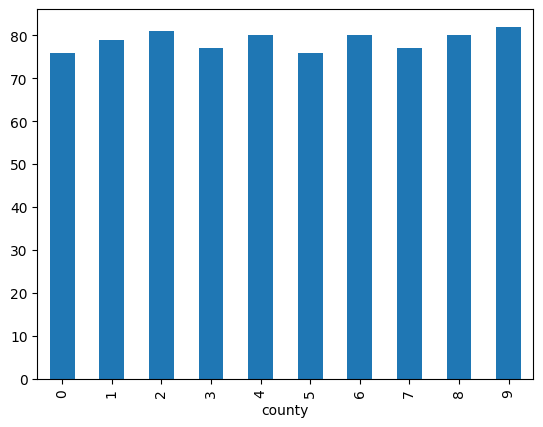

In [147]:
train_idxs = np.random.choice(range(len(df_balanced)), int(len(df_balanced)*0.85), replace=False)
train_df = df_balanced.loc[df_balanced.index.isin(train_idxs)]
test_df = df_balanced.loc[~df_balanced.index.isin(train_idxs)]

print(len(train_df))
print(len(test_df))

test_df.groupby('county').size().plot.bar()
plt.plot()


In [151]:
os.makedirs('./data/NSVD_B/train', exist_ok=True)
os.makedirs('./data/NSVD_B/test', exist_ok=True)

for i, row in tqdm(train_df.iterrows(), total=len(train_df)):
  src = pathlib.Path('./data/images') / row['filename']
  dst = pathlib.Path('./data/NSVD_B/train') / row['filename']
  shutil.copy(src, dst)

for i, row in tqdm(test_df.iterrows(), total=len(test_df)):
  src = pathlib.Path('./data/images') / row['filename']
  dst = pathlib.Path('./data/NSVD_B/test') / row['filename']
  shutil.copy(src, dst)

df_balanced.to_csv('./data/NSVD_B/data.csv', index=False)

100%|██████████| 788/788 [00:15<00:00, 49.68it/s] 
